In [115]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Задание 1

In [116]:
iris = load_iris(as_frame = True)

X = iris['data']
X.columns = ['s_length', 's_width', 'p_length', 'p_width']
y = pd.DataFrame(pd.Categorical.from_codes(iris.target, iris.target_names), columns = ['species'])

pd.concat([X, y], axis = 1).head()

,s_length,s_width,p_length,p_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [117]:
# Проверка на отсутствующие значения
print(f'Количество объектов с NaN: {X.isnull().any(axis = 1).sum()}') 

Количество объектов с NaN: 0


In [118]:
X.describe()

,s_length,s_width,p_length,p_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [119]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [120]:
decision_tree = DecisionTreeClassifier().fit(X, y)

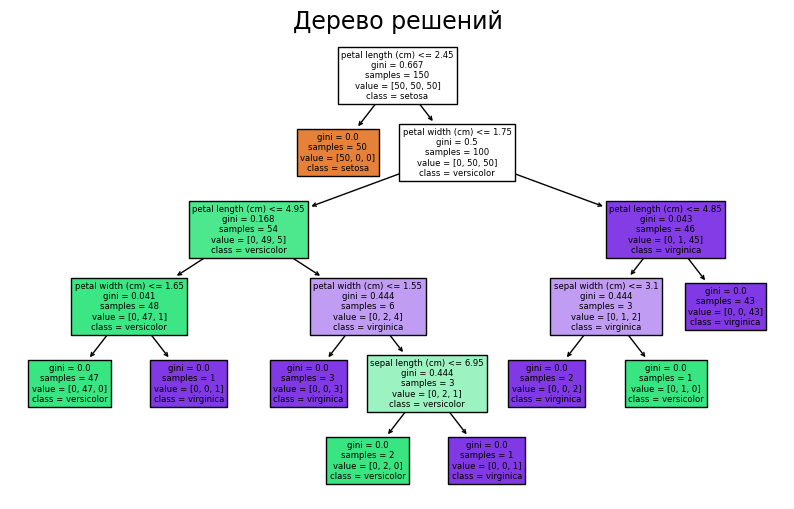

In [130]:
fig = plt.figure(figsize = (10, 6))

_ = plot_tree(decision_tree,
              feature_names = iris.feature_names,  
              class_names = list(iris.target_names),
              filled = True)

plt.title('Дерево решений', size = 17)
plt.show()

# Задание 2

In [122]:
gradBoost = GradientBoostingClassifier(n_estimators = 100, 
                                       learning_rate = 1.0,
                                       max_depth = 1)

gradBoost = gradBoost.fit(X, y)

In [123]:
importances = {iris.feature_names[i] : [gradBoost.feature_importances_[i]] for i in range(len(iris.feature_names))}
importances = pd.DataFrame(importances)

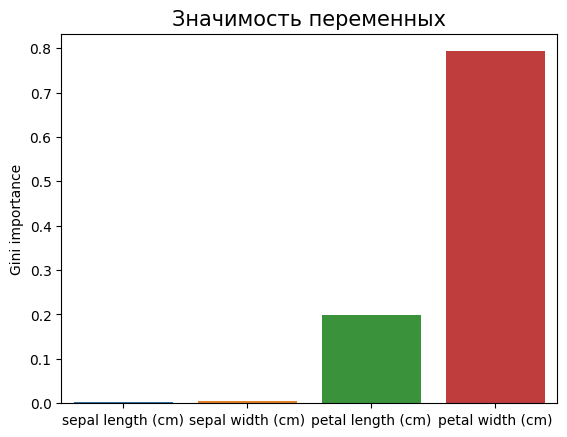

In [124]:
fig, ax = plt.subplots(1, 1)

sns.barplot(importances, ax = ax)

ax.set_ylabel('Gini importance')
plt.title('Значимость переменных', size = 15)
plt.show()

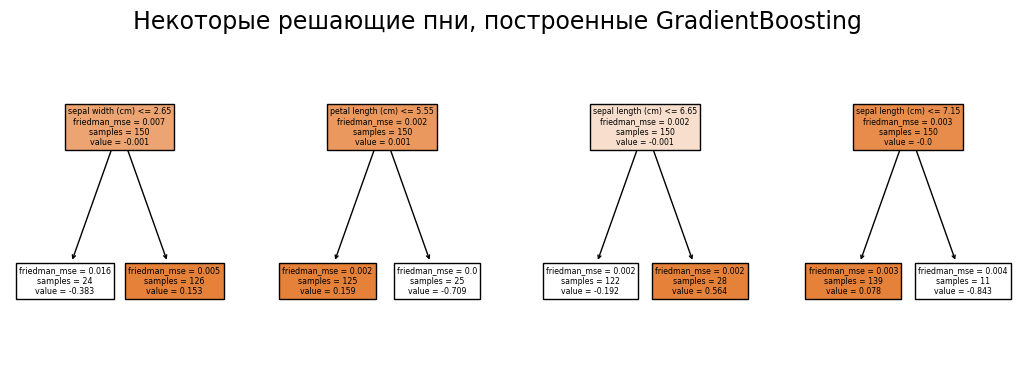

In [133]:
fig, ax = plt.subplots(1, 4)
fig.set_figwidth(13)
fig.set_figheight(4)

trees = np.random.choice(gradBoost.estimators_[:, 1], 4)

for i in range(4):
    plot_tree(trees[i],
              feature_names = iris.feature_names,  
              class_names = list(iris.target_names),
              filled = True,
              ax = ax[i])

plt.suptitle('Некоторые решающие пни, построенные GradientBoosting', size = 17)
plt.show()

# Задание 3